# TASK-1

For the sake of practice and to equip yourself with additional information, I suggest you to use another API here. What about using `AlphaVantage`. Alpha Vantage is a data providing company partnered with major exchanges and institutions. Using Alpha Vantage' API, it is possible to access stock prices, stock fundamentals, Forex information and many more with different time interval- e.g. intraday, daily, weekly, an so on. For more information, please see https://www.alphavantage.co/support/#support[Alpha Vantage's website.]

Let me change the tickers so that we can analyze different companies. This time, let's extract the stock prices of two social media companies, which are:
* Twitter
* Facebook

Having listed some relevant variables, we are now able to run the `APT` analysis. We could proceed by retrieving the data first. Again, we refer to the relate APIs to extract these data. Thanks to `Yahoo Finance` and `FRED`, we have stock prices, risk free rate, and stock market index (S&P-500) from the preceding part.

Let's import all the necessary libraries first.

In [52]:
import requests
from io import StringIO
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from fredapi import Fred

In [67]:
def getMonthlyData(symbol):
        parameters = {'function': 'TIME_SERIES_MONTHLY_ADJUSTED', 'symbol': symbol,
                       'outputsize':'full',
                       'datatype': 'csv', 
                       'apikey': 'LL1WA15IW41XV2T2'}

        response = requests.get('https://www.alphavantage.co/query', params=parameters)

        # Process the CSV file retrieved
        csvText = StringIO(response.text)
        data = pd.read_csv(csvText, index_col='timestamp')
        return data

Before starting, here is a little trick for you. The ticker of the `S&P-500` is `SPY` in Alpha Vantage API.

In [68]:
tickers = ["TWTR", "FB", "SPY"]
df = []
for i in tickers:
    df.append(getMonthlyData(i)[::-1]['close']['2015-01-01':'2021-05-01'])
stocks = pd.DataFrame(df).T
stocks.columns = tickers

In [69]:
stocks.head()


,TWTR,FB,SPY
timestamp,,,
2015-01-30,37.53,75.910,199.45
2015-02-27,48.08,78.970,210.66
2015-03-31,50.08,82.215,206.43
2015-04-30,38.96,78.770,208.46
2015-05-29,36.67,79.190,211.14


As per the article of Chen, Roll and Ross (1986), I want to pick the following three variables:
    
* Growth rate in industrial production

* Inflation rate

* Stock Index

These variables will be your independent variables as they have appeared to explain a significant portion of the time-series variability of stock returns.

At this point, to extract the macroeconomic variable, `FRED API` would be a convenient database:

In [70]:
fred = Fred(api_key='78b14ec6ba46f484b94db43694468bb1')

In [71]:
fred.search('industrial')

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
INDPRO,INDPRO,2021-08-06,2021-08-06,Industrial Production: Total Index,1919-01-01,2021-06-01,Monthly,M,Index 2017=100,Index 2017=100,Seasonally Adjusted,SA,2021-07-15 08:19:02-05:00,83,The Industrial Production Index (INDPRO) is an...
IPB50001N,IPB50001N,2021-08-06,2021-08-06,Industrial Production: Total Index,1919-01-01,2021-06-01,Monthly,M,Index 2017=100,Index 2017=100,Not Seasonally Adjusted,NSA,2021-07-15 08:19:10-05:00,41,The industrial production (IP) index measures ...
IPB50001SQ,IPB50001SQ,2021-08-06,2021-08-06,Industrial Production: Total Index,1919-01-01,2021-04-01,Quarterly,Q,Index 2017=100,Index 2017=100,Seasonally Adjusted,SA,2021-07-15 08:20:02-05:00,26,The industrial production (IP) index measures ...
IPB50001NQ,IPB50001NQ,2021-08-06,2021-08-06,Industrial Production: Total Index,1919-01-01,2021-04-01,Quarterly,Q,Index 2017=100,Index 2017=100,Not Seasonally Adjusted,NSA,2021-07-15 08:20:03-05:00,10,The industrial production (IP) index measures ...
BUSLOANS,BUSLOANS,2021-08-06,2021-08-06,"Commercial and Industrial Loans, All Commercia...",1947-01-01,2021-06-01,Monthly,M,Billions of U.S. Dollars,Bil. of U.S. $,Seasonally Adjusted,SA,2021-07-30 15:38:21-05:00,74,"For further information, please refer to the B..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
IPG3256SQ,IPG3256SQ,2021-08-06,2021-08-06,Industrial Production: Manufacturing: Non-Dura...,1972-01-01,2021-04-01,Quarterly,Q,Index 2017=100,Index 2017=100,Seasonally Adjusted,SA,2021-07-15 08:22:07-05:00,1,The industrial production (IP) index measures ...
IPG3256N,IPG3256N,2021-08-06,2021-08-06,Industrial Production: Manufacturing: Non-Dura...,1972-01-01,2021-06-01,Monthly,M,Index 2017=100,Index 2017=100,Not Seasonally Adjusted,NSA,2021-07-15 08:21:17-05:00,1,The industrial production (IP) index measures ...
IPG3256NQ,IPG3256NQ,2021-08-06,2021-08-06,Industrial Production: Manufacturing: Non-Dura...,1972-01-01,2021-04-01,Quarterly,Q,Index 2017=100,Index 2017=100,Not Seasonally Adjusted,NSA,2021-07-15 08:22:08-05:00,1,The industrial production (IP) index measures ...


In [72]:
ind = fred.get_series('INDPRO')
ind = ind['2015-01-01':'2021-05-01']

In [73]:
ind.head()

2015-01-01    102.8479
2015-02-01    102.2292
2015-03-01    101.8945
2015-04-01    101.2859
2015-05-01    100.8408
dtype: float64

In [74]:
fred.search('potential inflation')

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
FEDTARMDLR,FEDTARMDLR,2021-08-06,2021-08-06,Longer Run FOMC Summary of Economic Projection...,2012-01-25,2021-06-16,Not Applicable,NA,Percent,%,Not Seasonally Adjusted,NSA,2021-06-16 14:04:04-05:00,43,The longer-run projections are the rates of gr...
GDPC1CTMLR,GDPC1CTMLR,2021-08-06,2021-08-06,Longer Run FOMC Summary of Economic Projection...,2009-02-18,2021-06-16,Not Applicable,NA,Fourth Quarter to Fourth Quarter Percent Change,Fourth Qtr. to Fourth Qtr. % Chg.,Not Seasonally Adjusted,NSA,2021-06-16 14:04:08-05:00,30,The longer-run projections are the rates of gr...
UNRATECTMLR,UNRATECTMLR,2021-08-06,2021-08-06,Longer Run FOMC Summary of Economic Projection...,2009-02-18,2021-06-16,Not Applicable,NA,"Fourth Quarter, Percent","Fourth Qtr., %",Not Seasonally Adjusted,NSA,2021-06-16 14:04:12-05:00,17,The longer-run projections are the rates of gr...
GDPC1MDLR,GDPC1MDLR,2021-08-06,2021-08-06,Longer Run FOMC Summary of Economic Projection...,2015-06-17,2021-06-16,Not Applicable,NA,Fourth Quarter to Fourth Quarter Percent Change,Fourth Qtr. to Fourth Qtr. % Chg.,Not Seasonally Adjusted,NSA,2021-06-16 14:04:09-05:00,14,The longer-run projections are the rates of gr...
GDPC1RHLR,GDPC1RHLR,2021-08-06,2021-08-06,Longer Run FOMC Summary of Economic Projection...,2009-02-18,2021-06-16,Not Applicable,NA,Fourth Quarter to Fourth Quarter Percent Change,Fourth Qtr. to Fourth Qtr. % Chg.,Not Seasonally Adjusted,NSA,2021-06-16 14:04:12-05:00,12,The longer-run projections are the rates of gr...
PCECTPICTMLR,PCECTPICTMLR,2021-08-06,2021-08-06,Longer Run FOMC Summary of Economic Projection...,2009-02-18,2021-06-16,Not Applicable,NA,Fourth Quarter to Fourth Quarter Percent Change,Fourth Qtr. to Fourth Qtr. % Chg.,Not Seasonally Adjusted,NSA,2021-06-16 14:04:14-05:00,10,The longer-run projections are the rates of gr...
PCECTPIRLLR,PCECTPIRLLR,2021-08-06,2021-08-06,Longer Run FOMC Summary of Economic Projection...,2009-02-18,2021-06-16,Not Applicable,NA,Fourth Quarter to Fourth Quarter Percent Change,Fourth Qtr. to Fourth Qtr. % Chg.,Not Seasonally Adjusted,NSA,2021-06-16 14:04:17-05:00,9,The longer-run projections are the rates of gr...
FEDTARCTLLR,FEDTARCTLLR,2021-08-06,2021-08-06,Longer Run FOMC Summary of Economic Projection...,2015-06-17,2021-06-16,Not Applicable,NA,Percent,%,Not Seasonally Adjusted,NSA,2021-06-16 14:04:16-05:00,9,The longer-run projections are the rates of gr...
PCECTPIMDLR,PCECTPIMDLR,2021-08-06,2021-08-06,Longer Run FOMC Summary of Economic Projection...,2015-06-17,2021-06-16,Not Applicable,NA,Fourth Quarter to Fourth Quarter Percent Change,Fourth Qtr. to Fourth Qtr. % Chg.,Not Seasonally Adjusted,NSA,2021-06-16 14:04:20-05:00,7,The longer-run projections are the rates of gr...


In [75]:
inf = fred.get_series('CPIEALL')
inf = inf['2015-01-01':'2021-05-01']

As you are working with monthly data, it does not make sense to use risk free rate (`DGS3MO`) that you used in CAPM as it is daily rate. So, let's pick a monthly version of it, which is `GS3M`.Finally, you need to have risk free rate in APT analysis, as well. To do that, you can make use of `FRED` again. 

In [76]:
fred.search('risk free')

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
DGS10,DGS10,2021-08-06,2021-08-06,10-Year Treasury Constant Maturity Rate,1962-01-02,2021-08-04,Daily,D,Percent,%,Not Seasonally Adjusted,NSA,2021-08-05 15:23:08-05:00,97,For further information regarding treasury con...
GS10,GS10,2021-08-06,2021-08-06,10-Year Treasury Constant Maturity Rate,1953-04-01,2021-07-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2021-08-02 15:23:21-05:00,75,Averages of business days. For further informa...
WGS10YR,WGS10YR,2021-08-06,2021-08-06,10-Year Treasury Constant Maturity Rate,1962-01-05,2021-07-30,"Weekly, Ending Friday",W,Percent,%,Not Seasonally Adjusted,NSA,2021-08-02 15:24:09-05:00,60,Averages of business days. For further informa...
DGS1,DGS1,2021-08-06,2021-08-06,1-Year Treasury Constant Maturity Rate,1962-01-02,2021-08-04,Daily,D,Percent,%,Not Seasonally Adjusted,NSA,2021-08-05 15:24:01-05:00,79,For further information regarding treasury con...
DGS5,DGS5,2021-08-06,2021-08-06,5-Year Treasury Constant Maturity Rate,1962-01-02,2021-08-04,Daily,D,Percent,%,Not Seasonally Adjusted,NSA,2021-08-05 15:23:20-05:00,78,For further information regarding treasury con...
WGS1YR,WGS1YR,2021-08-06,2021-08-06,1-Year Treasury Constant Maturity Rate,1962-01-05,2021-07-30,"Weekly, Ending Friday",W,Percent,%,Not Seasonally Adjusted,NSA,2021-08-02 15:24:13-05:00,56,Averages of business days. For further informa...
GS1,GS1,2021-08-06,2021-08-06,1-Year Treasury Constant Maturity Rate,1953-04-01,2021-07-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2021-08-02 15:23:37-05:00,51,Averages of business days. For further informa...
DGS30,DGS30,2021-08-06,2021-08-06,30-Year Treasury Constant Maturity Rate,1977-02-15,2021-08-04,Daily,D,Percent,%,Not Seasonally Adjusted,NSA,2021-08-05 15:23:19-05:00,78,Yields on actively traded non-inflation-indexe...
GS5,GS5,2021-08-06,2021-08-06,5-Year Treasury Constant Maturity Rate,1953-04-01,2021-07-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2021-08-02 15:23:34-05:00,53,Averages of business days. For further informa...


In [77]:
risk_free = fred.get_series('GS1')
risk_free = risk_free['2015-01-01':'2021-05-01']

In [80]:
stocks.to_csv('stocks.csv')
risk_free.to_csv('risk_free.csv')
ind.to_csv('ind.csv')
inf.to_csv('inf.csv')

# TASK-2

In [ ]:
stocks.describe()

Well, it seems like we have 76 observations with varying statistics. For instance, aside from market index, mean of `SNAP` and `FB` are the lowest and highest ones, respectively. In parallel to this observation, we expect to have low standard deviation for `SNAP` and high one for `FB`. Yes, this is what we get, the standard deviation of `SNAP` is 14.3. This is also the lowest one among the stocks at our disposal. As for the `FB`, the standard deviation hits 57.7 and implies that it has the most risky asset as standard deviation is a proxy of risk in finance.

In what follows, as suggested, you need to compute inflation rate, which is nothing but the percentage change of it. Here is how you can do that:

In [14]:
inf_rate = inf.pct_change().dropna()

In [15]:
risk_free = risk_free / 12

As you can notice, there is a level difference between stock prices, inflation and industrial production index. To deal with the scaling issue, taking logarithm makes sense:

In [16]:
log_ind = np.log(ind)

In [82]:
returns = stocks.pct_change()
returns.dropna(inplace=True)
returns.head()

,TWTR,FB,SPY
timestamp,,,
2015-02-27,0.281108,0.040311,0.056205
2015-03-31,0.041597,0.041092,-0.020080
2015-04-30,-0.222045,-0.041902,0.009834
2015-05-29,-0.058778,0.005332,0.012856
2015-06-30,-0.012272,0.083028,-0.024865


To be consistent, you need to drop the last two months (April and May) of stock prices and the last month from inflation rate, and industrial production as industrial production index and inflation rate do not have observation at this date.

In [18]:
print(len(returns))
print(len(log_ind))
print(len(inf_rate))
print(len(risk_free))

75
76
75
76


In [19]:
log_ind = log_ind.iloc[1:]
risk_free = risk_free.iloc[1:]

In [20]:
inf_rate.index = returns.index
log_ind.index = returns.index
risk_free.index = returns.index

After completing the data collection and cleaning process and now we should combine all these variables into single data frame along the columns. Pandas' `concat` function does this for us and create a single data frame. But there is one more step to go. The indeces of the data should be matched properly. The following code does this for us:

In [21]:
apt_df = pd.concat([returns,inf_rate,log_ind,risk_free],axis=1)
apt_df.rename(columns = {0:'inf_rate', 1:'log_ind', 2:'risk_free'}, inplace=True)
apt_df

,TWTR,FB,SPY,inf_rate,log_ind,risk_free
timestamp,,,,,,
2015-02-27,0.281108,0.040311,0.056205,0.003891,4.658166,0.018333
2015-03-31,0.041597,0.041092,-0.020080,0.004887,4.655354,0.020833
2015-04-30,-0.222045,-0.041902,0.009834,0.002175,4.649447,0.019167
2015-05-29,-0.058778,0.005332,0.012856,0.004177,4.645104,0.020000
2015-06-30,-0.012272,0.083028,-0.024865,0.003744,4.641670,0.023333
...,...,...,...,...,...,...
2020-12-31,0.164266,-0.013756,0.032647,0.001039,4.662736,0.008333
2021-01-29,-0.066851,-0.054291,-0.010190,0.004240,4.671344,0.008333
2021-02-26,0.525035,-0.002748,0.027806,0.005315,4.635823,0.005833


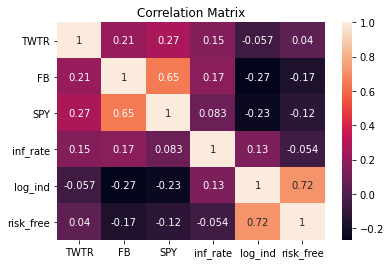

In [22]:
heat_corr = apt_df.corr()
sns.heatmap(heat_corr, annot=True)
plt.title("Correlation Matrix")
plt.show()

As expected, stocks and market index are highly correlated and we observe the similar phenemon among macro variables as they show high correlation, too.

In [23]:
cols = returns.columns
for i in cols:
    returns["excess_return_"+str(i)] = returns[i] - risk_free

In [24]:
returns.head()

,TWTR,FB,SPY,excess_return_TWTR,excess_return_FB,excess_return_SPY
timestamp,,,,,,
2015-02-27,0.281108,0.040311,0.056205,0.262775,0.021978,0.037871
2015-03-31,0.041597,0.041092,-0.020080,0.020764,0.020258,-0.040913
2015-04-30,-0.222045,-0.041902,0.009834,-0.241211,-0.061069,-0.009333
2015-05-29,-0.058778,0.005332,0.012856,-0.078778,-0.014668,-0.007144
2015-06-30,-0.012272,0.083028,-0.024865,-0.035605,0.059695,-0.048198


In [25]:
df_merged = pd.concat([returns.iloc[:, 3:], apt_df.loc[:,['inf_rate', 'log_ind']]],
                      axis=1, ignore_index=True)
df_merged.rename(columns={0:'excess_return_TWTR',
                        1:'excess_return_FB',
                        2:'excess_return_SPY',
                        3:'inf_rate',
                        4:'log_ind'}, inplace=True)

In [26]:
df_merged.head()

,excess_return_TWTR,excess_return_FB,excess_return_SPY,inf_rate,log_ind
timestamp,,,,,
2015-02-27,0.262775,0.021978,0.037871,0.003891,4.658166
2015-03-31,0.020764,0.020258,-0.040913,0.004887,4.655354
2015-04-30,-0.241211,-0.061069,-0.009333,0.002175,4.649447
2015-05-29,-0.078778,-0.014668,-0.007144,0.004177,4.645104
2015-06-30,-0.035605,0.059695,-0.048198,0.003744,4.641670


# TASK-3

As we did before, assigning new variable to dependent and independent variables faciliates the regression analysis. `excess_return_TWTR` is our dependent variable and it is labeled as y by convention. The rest of the variables are independent variables and they are labeled as `X_TWTR`:

In [27]:
y = df_merged['excess_return_TWTR']
X_TWTR = df_merged.iloc[:, 2:]

In [28]:
X_TWTR = sm.add_constant(X_TWTR, prepend=False)
APT_TWTR = sm.OLS(y, X_TWTR)
APT_results_TWTR = APT_TWTR.fit()

In [29]:
APT_results_TWTR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     excess_return_TWTR   R-squared:                       0.250
Model:                            OLS   Adj. R-squared:                  0.219
Method:                 Least Squares   F-statistic:                     7.908
Date:                Thu, 20 May 2021   Prob (F-statistic):           0.000127
Time:                        13:11:04   Log-Likelihood:                 40.621
No. Observations:                  75   AIC:                            -73.24
Df Residuals:                      71   BIC:                            -63.97
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
excess_return_SPY     0.6935      0.276      2.509      0.014       0.142       1.245
inf_rate             10.5900      7.563      1.400      0.166      -4.490      25.670
log_ind              -0.5722      0.675     -0.847      0.400      -1.918       0.774
const                 2.6241      3.123      0.840      0.404      -3.602       8.850
==============================================================================
Omnibus:                        3.081   Durbin-Watson:                   2.384
Prob(Omnibus):                  0.214   Jarque-Bera (JB):                2.337
Skew:                           0.303   Prob(JB):                        0.311
Kurtosis:                       3.617   Cond. No.                     2.17e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.17e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The findings suggest that the only statistically significant variable is market index `excess_return_SPY`, which has a coefficient of 0.6935 indicating a high correlation with dependent variable. Inflation rate and industrial production seem to have no explanatory power.

The same procedure is applied to `FB` given below:

In [30]:
y = df_merged['excess_return_FB']
X_FB = df_merged.iloc[:, 2:]

In [31]:
X_FB = sm.add_constant(X_FB, prepend=False)
APT_FB = sm.OLS(y,X_FB)
APT_results_FB = APT_FB.fit()

In [32]:
APT_results_FB.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       excess_return_FB   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     70.38
Date:                Thu, 20 May 2021   Prob (F-statistic):           3.16e-21
Time:                        13:11:04   Log-Likelihood:                 108.25
No. Observations:                  75   AIC:                            -208.5
Df Residuals:                      71   BIC:                            -199.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
excess_return_SPY     1.0100      0.112      9.002      0.000       0.786       1.234
inf_rate              4.8534      3.069      1.581      0.118      -1.267      10.974
log_ind              -0.3202      0.274     -1.169      0.246      -0.867       0.226
const                 1.4941      1.267      1.179      0.242      -1.033       4.021
==============================================================================
Omnibus:                        3.565   Durbin-Watson:                   2.078
Prob(Omnibus):                  0.168   Jarque-Bera (JB):                3.026
Skew:                           0.275   Prob(JB):                        0.220
Kurtosis:                       3.816   Cond. No.                     2.17e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.17e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Similar to our findings in Twitter, we have single statistically significant variable,`excess_return_SPY`. Its estimated coefficient is 1.01 showing even higher correlation with dependent variable. However, inflation rate and industrial production are again not statisticall significant, so it makes no sense to interpret the estimated coefficients of these variables.

# TASK-4

In [33]:
def SML(risk_free,ret,betas):
    asset_ret = [risk_free + (rm - risk_free) * i for i in betas]
    plt.plot(betas, asset_ret)
    plt.xlabel("Asset Beta")
    plt.ylabel("Asset Return")
    plt.title("Security Market Line")
    plt.plot(1, ret, "ro")

In [34]:
rm = returns['SPY'].mean()
risk_free = risk_free.mean()
betas = [APT_results_TWTR.params[0], APT_results_FB.params[0]]

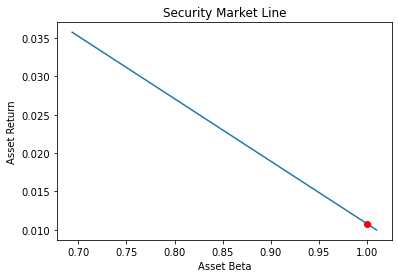

In [35]:
SML(risk_free, rm, betas)

Well, contrary to the theory, the slope of SML is negative implying that the more systematic risk you have, the lower the expected return is. This sounds awkward, but it happens from time to time.

The negative market risk premium maybe a result of an economic recession or crises in the sample period, and this led us to have a either negative beta or market premium. 